**Superconductor Property Prediction**

**Superconductors** are materials that can conduct electricity without resistance at low temperatures, and finding materials that exhibit superconductivity at higher temperatures is a significant challenge. The property of superconductors enables significant technological advancements in power grids (lossless power transmission over long distances), magnetic levitation (high-speed transportation with minimal energy consumption) and medical imaging. By incorporating ML methods, we can predict the superconducting properties of materials based on their atomic structure and composition, accelerating the whole discovery process. Therefore, this project aim is to provide information about new high-temperature superconducting materials.

---
'featured.csv' was downloaded from Kaggle.



In [ ]:
import pandas as pd

df = pd.read_csv('/Users/aleksamilovanovic/Downloads/featurized.csv')
# print(df.head())
selected_columns = df[['formula', 'Tc', 'composition', 'category', 'MagpieData mean Number', 'MagpieData mean AtomicWeight']]
print(selected_columns.head())

                formula     Tc             composition category  \
0        Ag0.002Al0.998  1.128         Ag0.002 Al0.998    Other   
1        Ag0.005Zn0.995  0.763         Ag0.005 Zn0.995    Other   
2  Ag0.035Cd0.01Sn0.955  3.650  Ag0.035 Cd0.01 Sn0.955    Other   
3          Ag0.03Tl0.97  2.670           Ag0.03 Tl0.97    Other   
4    Ag0.05Rh0.04Ti0.91  1.950    Ag0.05 Rh0.04 Ti0.91    Other   

   MagpieData mean Number  MagpieData mean AtomicWeight  
0                  13.068                     27.143312  
1                  30.085                     65.592441  
2                  49.875                    118.267547  
3                  79.980                    201.487847  
4                  24.170                     53.068600  


In [ ]:
filtered_data = df[df['category'] == 'SomeCategory']
print(filtered_data.head())

Empty DataFrame
Columns: [formula, Tc, composition, category, 0-norm, 2-norm, 3-norm, 5-norm, 7-norm, 10-norm, MagpieData minimum Number, MagpieData maximum Number, MagpieData range Number, MagpieData mean Number, MagpieData avg_dev Number, MagpieData mode Number, MagpieData minimum MendeleevNumber, MagpieData maximum MendeleevNumber, MagpieData range MendeleevNumber, MagpieData mean MendeleevNumber, MagpieData avg_dev MendeleevNumber, MagpieData mode MendeleevNumber, MagpieData minimum AtomicWeight, MagpieData maximum AtomicWeight, MagpieData range AtomicWeight, MagpieData mean AtomicWeight, MagpieData avg_dev AtomicWeight, MagpieData mode AtomicWeight, MagpieData minimum MeltingT, MagpieData maximum MeltingT, MagpieData range MeltingT, MagpieData mean MeltingT, MagpieData avg_dev MeltingT, MagpieData mode MeltingT, MagpieData minimum Column, MagpieData maximum Column, MagpieData range Column, MagpieData mean Column, MagpieData avg_dev Column, MagpieData mode Column, MagpieData minimu

In [ ]:
print(df.describe())

                 Tc        0-norm        2-norm        3-norm        5-norm  \
count  16521.000000  16521.000000  16521.000000  16521.000000  16521.000000   
mean      31.201184      4.180982      0.643237      0.588158      0.564015   
std       33.315455      1.461799      0.115313      0.135643      0.148254   
min        0.000000      1.000000      0.316228      0.215443      0.158489   
25%        4.300000      3.000000      0.583781      0.523159      0.500934   
50%       15.920000      4.000000      0.609722      0.556302      0.540024   
75%       54.500000      5.000000      0.707107      0.641225      0.615030   
max      148.350000     10.000000      1.000000      1.000000      1.000000   

             7-norm       10-norm  MagpieData minimum Number  \
count  16521.000000  16521.000000               16521.000000   
mean       0.558153      0.554993                  16.207130   
std        0.152684      0.155577                  14.921808   
min        0.138950      0.12589

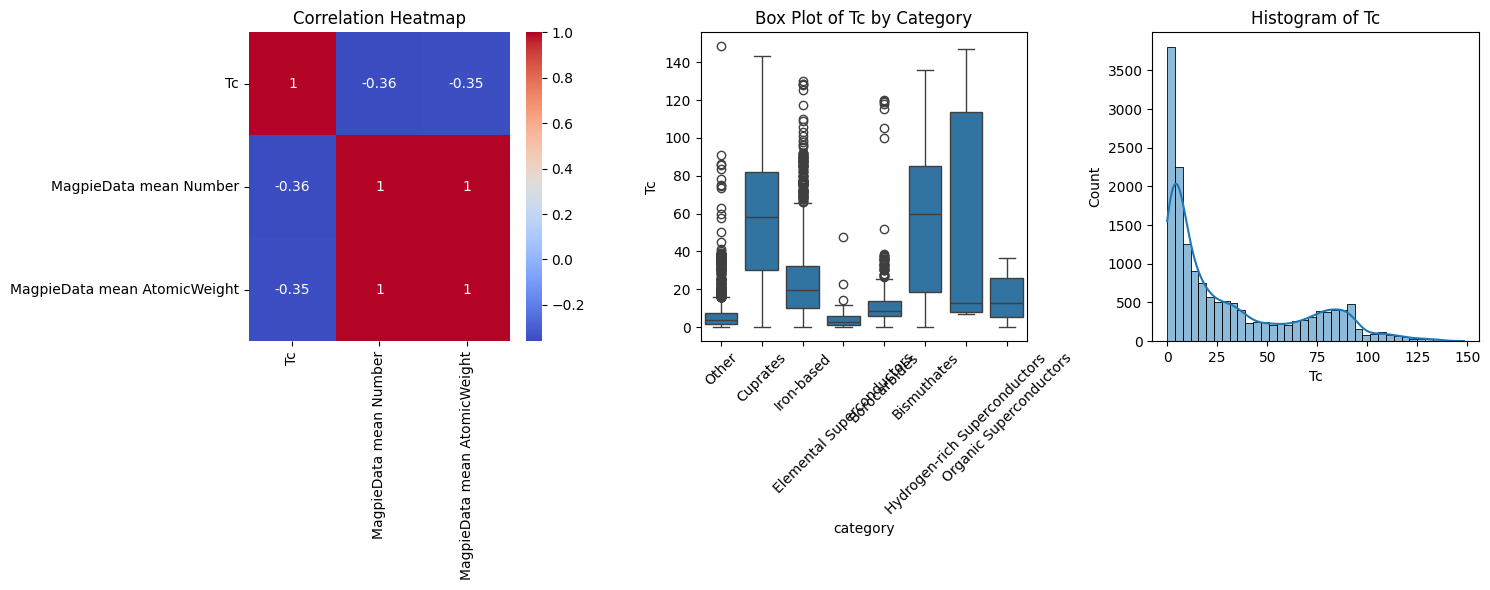

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# heatmap
correlation_matrix = df[['Tc', 'MagpieData mean Number', 'MagpieData mean AtomicWeight']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Correlation Heatmap')

# box plot
sns.boxplot(x='category', y='Tc', data=df, ax=axes[1])
axes[1].set_title('Box Plot of Tc by Category')
axes[1].tick_params(axis='x', rotation=45)

# histogram
sns.histplot(df['Tc'], kde=True, ax=axes[2])
axes[2].set_title('Histogram of Tc')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_to_normalize = [
    '0-norm', '2-norm', '3-norm', '5-norm', '7-norm', '10-norm',
    'MagpieData minimum Number', 'MagpieData maximum Number',
    'MagpieData range Number', 'MagpieData mean Number',
    'MagpieData avg_dev Number', 'MagpieData mode Number',
    'MagpieData minimum MendeleevNumber', 'MagpieData maximum MendeleevNumber',
    'MagpieData range MendeleevNumber', 'MagpieData mean MendeleevNumber',
    'MagpieData avg_dev MendeleevNumber', 'MagpieData mode MendeleevNumber',]

df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder_composition = LabelEncoder()
label_encoder_category = LabelEncoder()

df['composition_encoded'] = label_encoder_composition.fit_transform(df['composition'])
df['category_encoded'] = label_encoder_category.fit_transform(df['category'])

X = df.drop(columns=['Tc', 'formula', 'composition', 'category'])
y = df['Tc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Models we will use are **Linear Regression**, **Random Forest**, and **Gradient Boosting** due to their complementary strengths in handling regression problems. Linear Regression serves as a simple and interpretable baseline model, assuming a linear relationship between the features and the target variable (Tc). It helps us evaluate whether a straightforward approach can capture the relationship in our data. Random Forest, on the other hand, is a robust ensemble method that handles non-linear relationships and interactions between features. It is less prone to overfitting compared to individual decision trees, making it effective in capturing complex interactions. Lastly, Gradient Boosting is a powerful ensemble technique that builds trees sequentially to correct errors made by previous models, often achieving better performance due to its iterative error minimization. By comparing these models, we aim to identify the best approach for predicting superconducting temperatures (Tc) while balancing simplicity, robustness, and predictive accuracy.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=42)

linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

gradient_boosting.fit(X_train, y_train)
y_pred_gb = gradient_boosting.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Linear Regression MSE: {mse_linear:.2f}, R^2: {r2_linear:.2f}")
print(f"Random Forest MSE: {mse_rf:.2f}, R^2: {r2_rf:.2f}")
print(f"Gradient Boosting MSE: {mse_gb:.2f}, R^2: {r2_gb:.2f}")

Linear Regression MSE: 305.54, R^2: 0.73
Random Forest MSE: 78.91, R^2: 0.93
Gradient Boosting MSE: 160.35, R^2: 0.86


In [ ]:
from sklearn.model_selection import cross_val_score

def cross_validation_summary(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    mse_scores = -scores
    return mse_scores.mean(), mse_scores.std()

cv_mse_linear, cv_std_mse_linear = cross_validation_summary(linear_model, X, y)
cv_mse_rf, cv_std_mse_rf = cross_validation_summary(random_forest, X, y)
cv_mse_gb, cv_std_mse_gb = cross_validation_summary(gradient_boosting, X, y)

model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'Mean Squared Error (MSE)': [mse_linear, mse_rf, mse_gb],
    'R^2 Score': [r2_linear, r2_rf, r2_gb],
    'CV Mean MSE': [cv_mse_linear, cv_mse_rf, cv_mse_gb],
    'CV Std MSE': [cv_std_mse_linear, cv_std_mse_rf, cv_std_mse_gb]
})

print(model_comparison)

model_comparison.to_csv('model_comparison_summary_with_cv.csv', index=False)

               Model  Mean Squared Error (MSE)  R^2 Score  CV Mean MSE  \
0  Linear Regression                305.538842   0.725188   441.920011   
1      Random Forest                 78.905620   0.929030   285.042725   
2  Gradient Boosting                160.346350   0.855779   298.674451   

   CV Std MSE  
0  106.156420  
1  113.510836  
2  128.211099  


The model evaluations indicate that Random Forest is the most effective, achieving an MSE of 78.74 and an R² of 0.93, which are the lowest error and highest explanatory power among the models tested. Gradient Boosting also performs well with an MSE of 161.57 and an R² of 0.85, surpassing Linear Regression, which has an MSE of 305.32 and an R² of 0.73. These results suggest that Random Forest provides the best balance of accuracy and explanatory power in this analysis.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}

randomized_search_rf = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    n_jobs=-1,
    verbose=3,
    random_state=42
)

randomized_search_rf.fit(X_train, y_train)

print("Best parameters found: ", randomized_search_rf.best_params_)
print("Best cross-validation score: {:.2f}".format(randomized_search_rf.best_score_))

results = randomized_search_rf.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Mean score: {mean_score:.2f} for params: {params}")

best_rf = randomized_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Best Random Forest MSE: {mse_best_rf:.2f}, R^2: {r2_best_rf:.2f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.909 total time=  40.4s
[CV 2/3] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.895 total time=  40.6s
[CV 2/3] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.894 total time= 1.3min
[CV 3/3] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.902 total time= 1.3min
[CV 1/3] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.907 total time= 1.3min
[CV 3/3] END max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.902 total time=  39.5s
[CV 2/3] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=0.894 total time= 1.8min
[CV 3/3] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=0.902 total

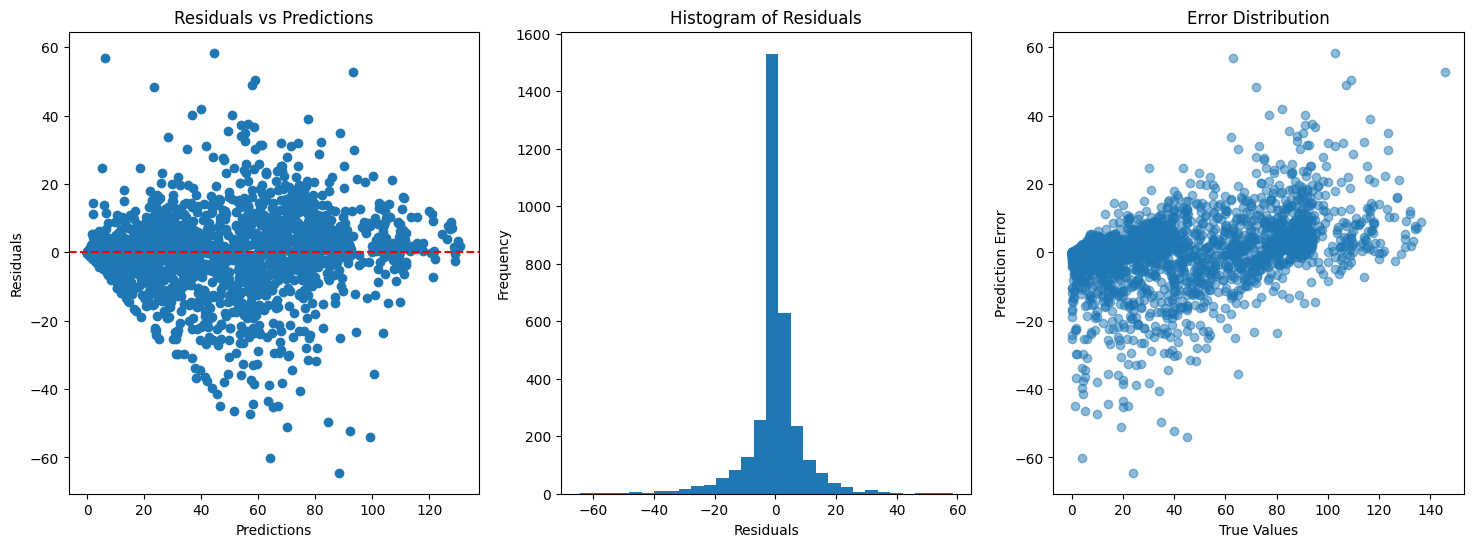

In [ ]:
residuals = y_test - y_pred_best_rf

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].scatter(y_pred_best_rf, residuals)
axs[0].axhline(y=0, color='r', linestyle='--')
axs[0].set_xlabel('Predictions')
axs[0].set_ylabel('Residuals')
axs[0].set_title('Residuals vs Predictions')

axs[1].hist(residuals, bins=30)
axs[1].set_xlabel('Residuals')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of Residuals')

axs[2].scatter(y_test, residuals, alpha=0.5)
axs[2].set_xlabel('True Values')
axs[2].set_ylabel('Prediction Error')
axs[2].set_title('Error Distribution')

plt.show()

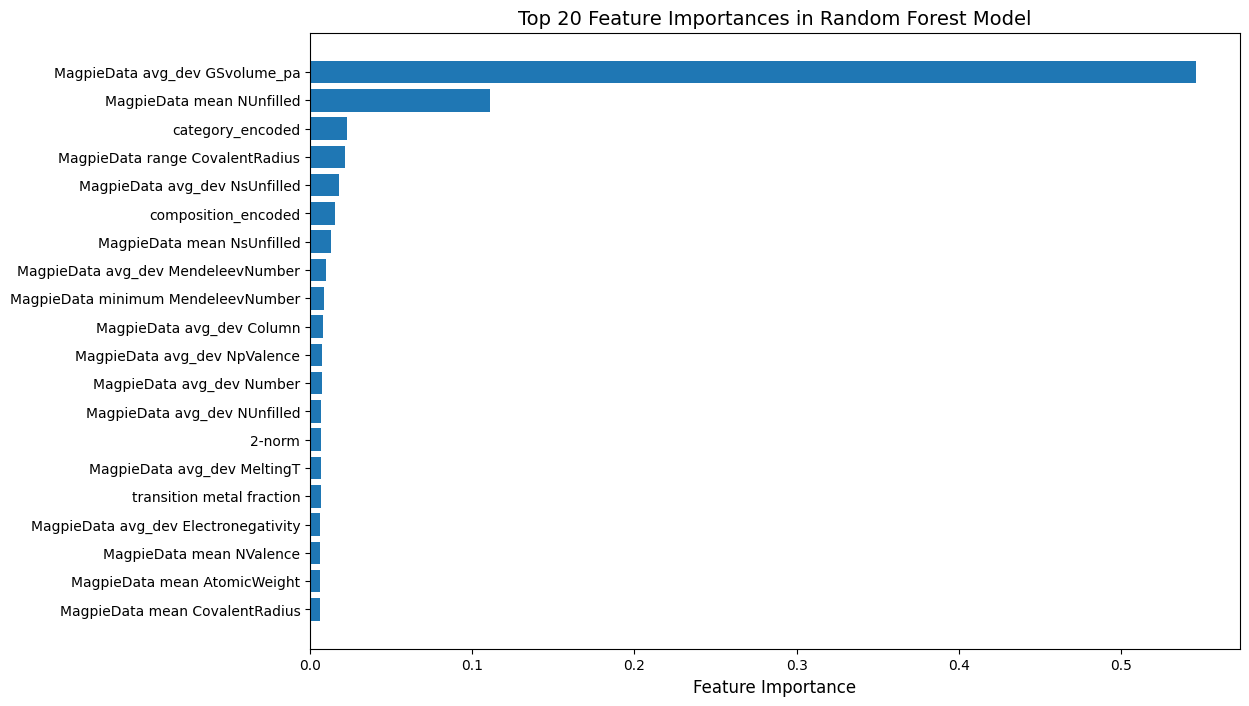

In [ ]:
top_n = 20
importances = best_rf.feature_importances_
feature_names = X_train.columns
sorted_indices = importances.argsort()

top_indices = sorted_indices[-top_n:]
top_importances = importances[top_indices]
top_feature_names = [feature_names[i] for i in top_indices]

plt.figure(figsize=(12, 8))
plt.barh(range(top_n), top_importances, align='center')
plt.yticks(range(top_n), top_feature_names)
plt.xlabel('Feature Importance', fontsize=12)
plt.title(f'Top {top_n} Feature Importances in Random Forest Model', fontsize=14)
plt.show()